### Packages ###

- numpy : fundamental package for scientific computing
- sklean : provides simple and efficient tools for data mining and data analysis
- matplotlib : library for plotting graphs
- testCases : provides some test examples to assess the correctness of functions

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases_v2 import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

### Dataset ###
This dataset loads a 'flower' 2-class dataset into variables X and Y
The data looks like a flower with some red (label y = 0) and some blue (y = 1). The goal is to build a model to fit this data and classify regions as either red or blue

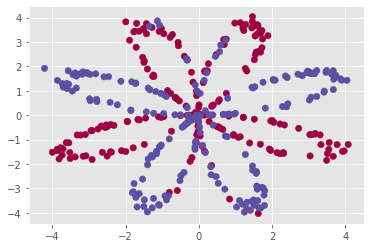

In [112]:
X, Y = load_planar_dataset()
# visualize data
plt.style.use('ggplot')
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

- a numpy array (matrix) X that contains features (x1, x2)
- a numpy array (vector) Y that contains labels (red:0, blue:1)

In [113]:
shapeX = X.shape
shapeY = Y.shape
m = X[0].shape

print ('The shape of X is : {}'.format(shapeX))
print ('The shape of Y is : {}'.format(shapeY))
print ('I have m = %d training examples' % (m))

The shape of X is : (2, 400)
The shape of Y is : (1, 400)
I have m = 400 training examples


### Simple Logistic Regression ###
Checking how a logistic regression performs on the above dataset

C:\Users\siddh\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  of logistic regression : 47% (percentage of correctly labelled datapoints)


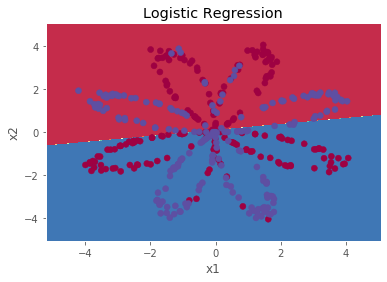

In [114]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegression().fit(X.T, Y.T)
#clf.fit(X.T, Y.T);

# plot the decion boundary for logistic regression
plt.style.use('ggplot')
plot_decision_boundary(lambda x : clf.predict(x), X, Y.ravel())
plt.title('Logistic Regression')

# print accuracy
LR_preditctions = clf.predict(X.T)
print ('Accuracy  of logistic regression : %d' % float((np.dot(Y, LR_preditctions) + np.dot(1-Y, 1-LR_preditctions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Interpretation** : The dataset is not linearly sepearable, so logistic regression does not perform well

### Neural Network Model ###

<img src="images/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Methodology to build a neural network** :
    1. Define the neural network structure (# of input units, # of hidden units, etc)
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute Loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)


#### Defining the neural network structure ####
    - n_x : the size of the input layer
    - n_h : the size of the hidden layer
    - n_y : the size of the output layer

In [115]:
def layer_sizes(X, Y):
    '''
    Arguments :
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape  (output size, number of examples)
    
    Returns :
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    '''
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [116]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print ('The size of the input layer is : n_x  = {}'.format(n_x))
print ('The size of the hidden layer is : n_h  = {}'.format(n_h))
print ('The size of the ouput layer is : n_y  = {}'.format(n_y))

The size of the input layer is : n_x  = 5
The size of the hidden layer is : n_h  = 4
The size of the ouput layer is : n_y  = 2


### Initialize the model parameters
- Random initialization of weights
- zero initialization for bias vectors

In [117]:
def initialize_parameters(n_x, n_h, n_y):
    '''
    Argument :
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns :
    params -- python dictionar containing parameters:
                W1 -- weight matrix of shape (n_h, n_x)
                b1 -- bias vector of shape (n_h, 1)
                W2 -- weight matrix of shape (n_y, n_h)
                b2 -- bias vector of shape  (n_y, 1)
    '''
    np.random.seed(2) # seed is set up so that the outputs match even though the initialization is random
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {'W1' : W1,
                  'b1' : b1,
                  'W2' : W2,
                  'b2' : b2}
    
    return parameters

In [118]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print ('W1 = {}'.format(parameters['W1']))
print ('b1 = {}'.format(parameters['b1']))
print ('W2 = {}'.format(parameters['W2']))
print ('b2 = {}'.format(parameters['b2']))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


### The Loop - Implement forward propagation ###
Steps to implement are
- Retrieve each parameter from the dictionary 'parameters'
- Implement forward propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all the predictions on all the examples in the training set)

Values needed in the backpropagation are stored in 'cache'

In [119]:
def forward_propagation(X, parameters):
    '''
    Argument : 
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing the parameters (weights and bias from initialization function)
    
    Returns :
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing Z1, A1, Z2, A2
    '''
    # retrieve each parameter from the dictionary
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # implement forward propagation to calculate A2 (probabilites)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {'Z1' : Z1,
             'A1' : A1,
             'Z2' : Z2,
             'A2' : A2}
    
    return A2, cache

After computing $A^{[2]}$ which contains $a^{[2](i)}$ for every example, can now compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

- an example of implementing cross-entropy loss : 
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)               
```

Can either use np.multiply() and then np.sum() or directly np.dot()
If np.multiply is used followed by np.sum the end result will be a type float, whereas if np.dot is used, the result will be a 2D numpy array. Can use np.squeeze() to remove redundant dimensions (in the case of single float, this will be reduced to a zero dimension array). Can cast the array as a type float using float()

In [120]:
def compute_cost(A2, Y):
    '''
    Computes the cross-entropy cost given in the equation
    
    Arguments : 
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- 'true' labels vector of shape (1, number of examples)
    
    Returns :
    cost --  cross entropy cost given in the equation
    '''
    m = Y.shape[1]  # number of examples
    # compute cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), (1-Y))
    cost = - np.sum(logprobs) / m
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension expected (turns [[17]] to 17)
    assert(isinstance(cost, float))
    
    return cost

### Backward propagation ###

Implement backward propagation using cache computed during forward propagation

<img src="images/grad_summary.png" style="width:600px;height:300px;">

- To compute dZ1, need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. So can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [121]:
def backward_propagation(parameters, cache, X, Y):
    '''
    Implement the backward propagation using formulas above
    
    Arguments :
    parameters -- python dictionary containing parameters
    cache -- python dictionary containing Z1, A1, Z2, A2
    X -- input data of shape (2, number of examples)
    Y -- 'true' labels vector of shape (1, number of examples)
    
    Returns :
    grads -- python dictionary containing gradients with respect to different parameters
    '''
    m = X.shape[1]
    # first retrieve W1 and W2 from dictionary parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # retrieve A1 and A2 from dictionary cache
    A1 = cache['A1']
    A2 = cache['A2']
    
    # backward propagation : calculate dW1, db1, dW2, db2
    dZ2 = A2 - Y
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2)) 
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

#### Gradient Descent ####

Use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2)

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">


In [122]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    '''
    Updates parameters using the gradient descent update rule above
    
    Arguments :
    parameters -- python dictionary containing parameters
    grads -- python dictionary contating all gradients
    
    Returns :
    parameters -- python dictionary contating updated parameters
    '''
    # retrieve each parameter from dictionary parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # retrieve each parameter from dictionary grads
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters
    

### Combined nn_model ###

In [126]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    '''
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- dataset 0f shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns :
    parameters -- parameters learnt by the model which are further used for predictions
    '''
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # gradient descent
    for i in range(0, num_iterations):
        
        # forward propagation
        A2, cache = forward_propagation(X, parameters)
        # cost function
        cost = compute_cost(A2, Y)
        # back propagation
        grads = backward_propagation(parameters, cache, X, Y)
        # gradient descent parameter update
        parameters = update_parameters(parameters, grads)
        # print cost every 100 iterations
        if print_cost  and i % 1000 == 0:
            print ('Cost after iteration {} : {}'.format(i, cost))
        
    return parameters

### Predictions ###

predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [127]:
def predict(parameters, X):
    '''
    Using the learned parameters, to predict class for each example in X
    
    Arguments  :
    parameters -- python dictionary containing parameters
    X -- input data of size (n_x, m)
    
    Returns :
    predictions -- vector of predictions of the model (red : 0 / blue : 1)
    '''
    # compute probabilities using forward propagation and classify to 0/1 using 0.5 as the threshold
    A2, cache = forward_propagation(X, parameters)
    predictions = A2 > 0.5
    
    return predictions

Cost after iteration 0 : 0.6930480201239823
Cost after iteration 1000 : 0.28808329356901835
Cost after iteration 2000 : 0.25438549407324496
Cost after iteration 3000 : 0.23386415038952196
Cost after iteration 4000 : 0.22679248744854008
Cost after iteration 5000 : 0.22264427549299015
Cost after iteration 6000 : 0.21973140404281316
Cost after iteration 7000 : 0.21750365405131294
Cost after iteration 8000 : 0.21950396469467315
Cost after iteration 9000 : 0.2185709575018246


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

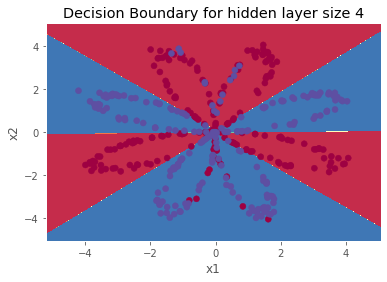

In [128]:
# Building the model with n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

#  plotting the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.flatten())
plt.title('Decision Boundary for hidden layer size {}'.format(4))

In [129]:
# print accuracy
predictions = predict(parameters, X)
print ('Accuracy : {} %'.format(float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T)) / float(Y.size) * 100)))

Accuracy : 90.75 %


#### Tuning hidden layer size ####

Accuracy for 1 hidden units : 67.5 %
Accuracy for 2 hidden units : 67.25 %
Accuracy for 3 hidden units : 91.0 %
Accuracy for 4 hidden units : 90.75 %
Accuracy for 5 hidden units : 91.5 %
Accuracy for 20 hidden units : 91.25 %
Accuracy for 50 hidden units : 92.25 %


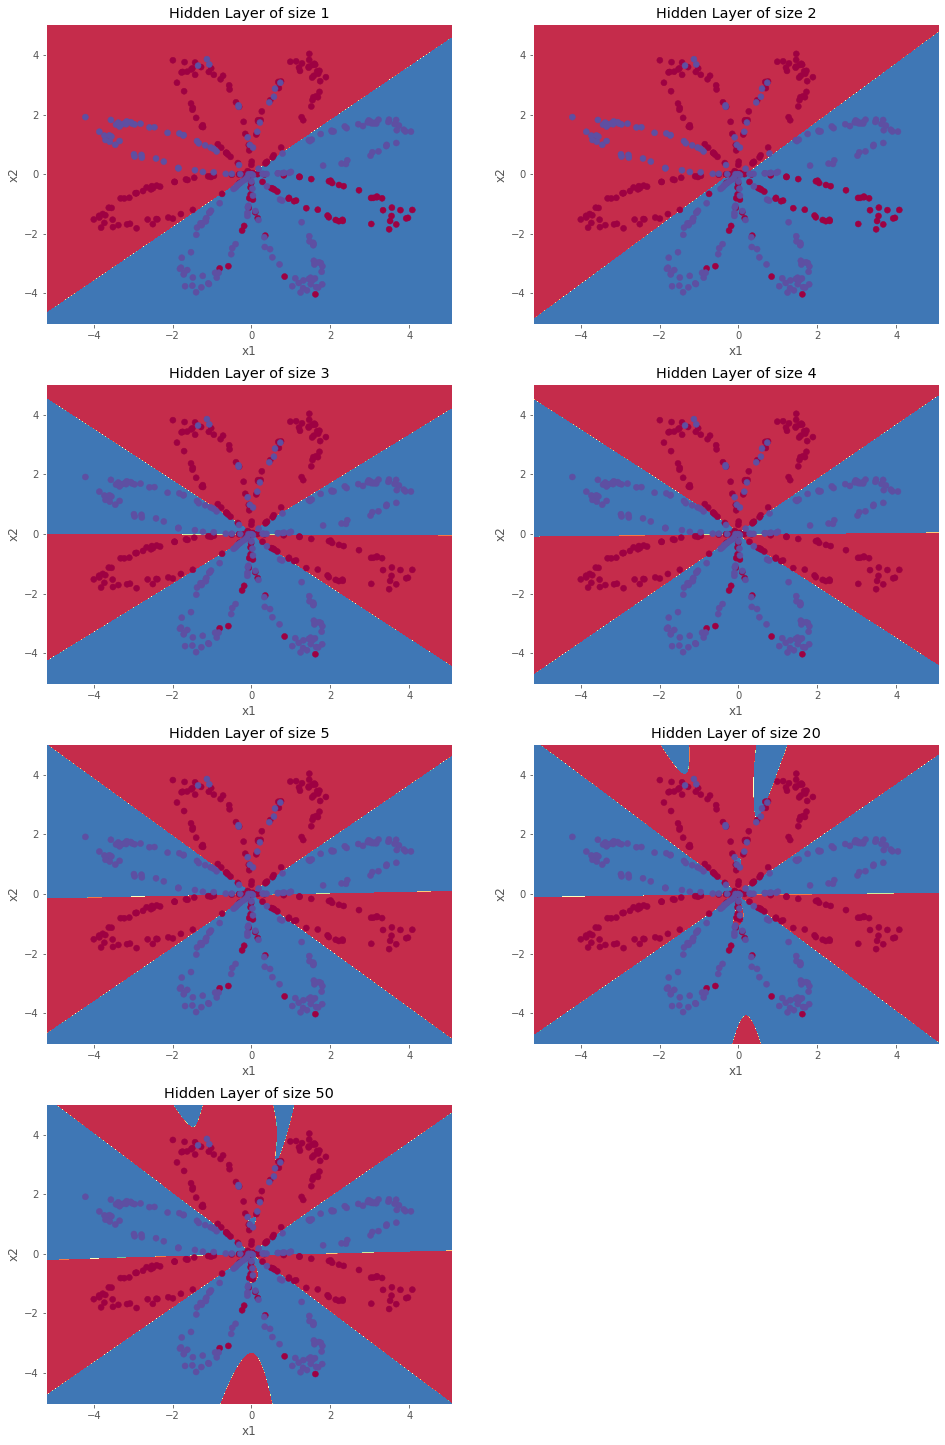

In [130]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size {}'.format(n_h))
    parameters = nn_model(X, Y, n_h, num_iterations=10000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.flatten())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T)) / float(Y.size) * 100)
    print ('Accuracy for {} hidden units : {} %'.format(n_h, accuracy))

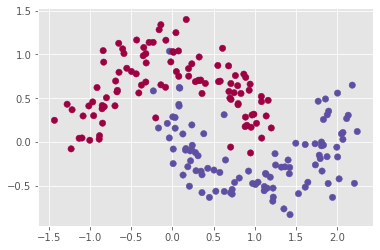

In [134]:
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

dataset = "noisy_moons"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.flatten(), s=40, cmap=plt.cm.Spectral);

Cost after iteration 0 : 0.69299178402179
Cost after iteration 1000 : 0.16713738929769073
Cost after iteration 2000 : 0.06909233747100467
Cost after iteration 3000 : 0.06371577519872601
Cost after iteration 4000 : 0.06131189860007172
Cost after iteration 5000 : 0.05966943307346794
Cost after iteration 6000 : 0.05836382166708096
Cost after iteration 7000 : 0.05727875845545485
Cost after iteration 8000 : 0.05635900394747853
Cost after iteration 9000 : 0.055568699777648646


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

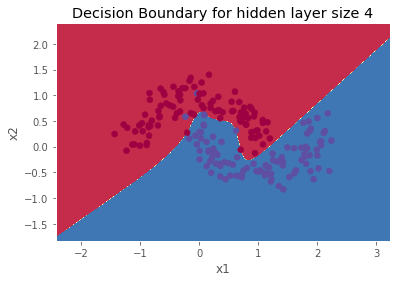

In [135]:
# Building the model with n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

#  plotting the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.flatten())
plt.title('Decision Boundary for hidden layer size {}'.format(4))

Accuracy for 1 hidden units : 86.5 %
Accuracy for 2 hidden units : 87.0 %
Accuracy for 3 hidden units : 97.0 %
Accuracy for 4 hidden units : 98.5 %
Accuracy for 5 hidden units : 98.5 %
Accuracy for 20 hidden units : 99.0 %
Accuracy for 50 hidden units : 99.0 %


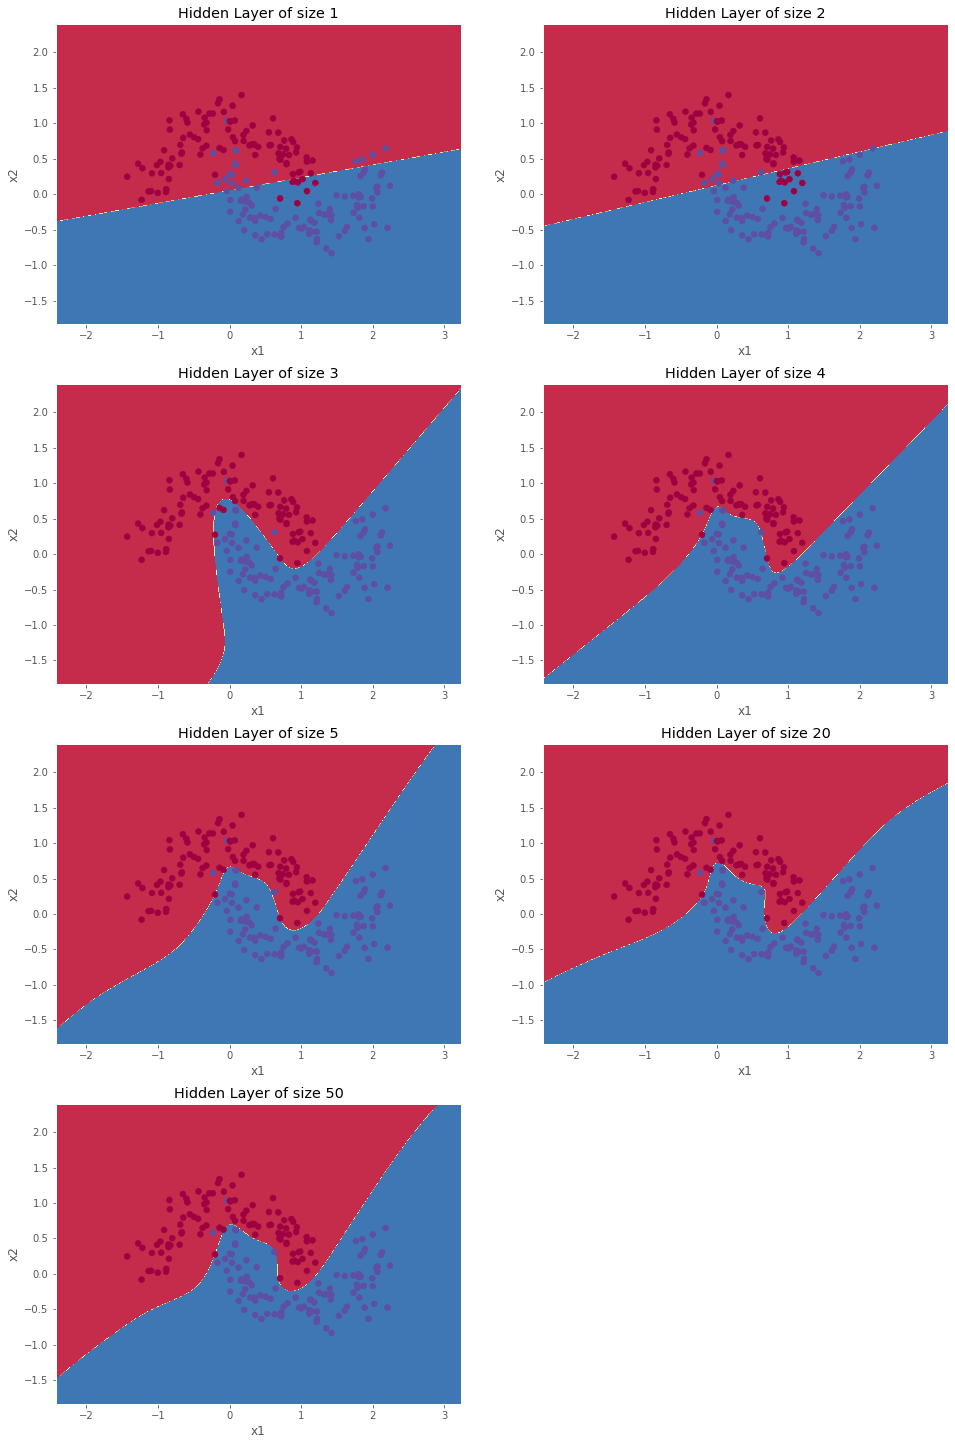

In [136]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size {}'.format(n_h))
    parameters = nn_model(X, Y, n_h, num_iterations=10000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.flatten())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T)) / float(Y.size) * 100)
    print ('Accuracy for {} hidden units : {} %'.format(n_h, accuracy))

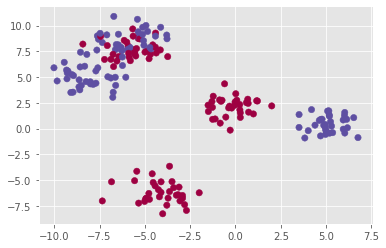

In [137]:
dataset = "blobs"

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.flatten(), s=40, cmap=plt.cm.Spectral);

Cost after iteration 0 : 0.6935267128946734
Cost after iteration 1000 : 0.3243875308324452
Cost after iteration 2000 : 0.323298549576638
Cost after iteration 3000 : 0.32303581835625794
Cost after iteration 4000 : 0.3229144477039456
Cost after iteration 5000 : 0.32284430884561033
Cost after iteration 6000 : 0.32279857466105566
Cost after iteration 7000 : 0.3227663829209911
Cost after iteration 8000 : 0.32274248893025104
Cost after iteration 9000 : 0.3227240477345974


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

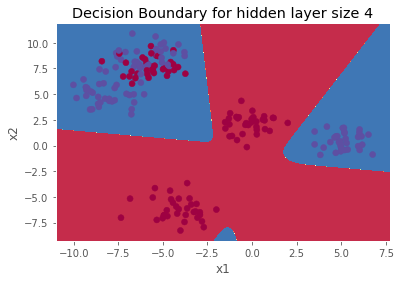

In [138]:
# Building the model with n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

#  plotting the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.flatten())
plt.title('Decision Boundary for hidden layer size {}'.format(4))

Accuracy for 1 hidden units : 67.0 %
Accuracy for 2 hidden units : 67.0 %
Accuracy for 3 hidden units : 83.0 %
Accuracy for 4 hidden units : 83.0 %
Accuracy for 5 hidden units : 83.0 %
Accuracy for 20 hidden units : 90.5 %
Accuracy for 50 hidden units : 83.5 %


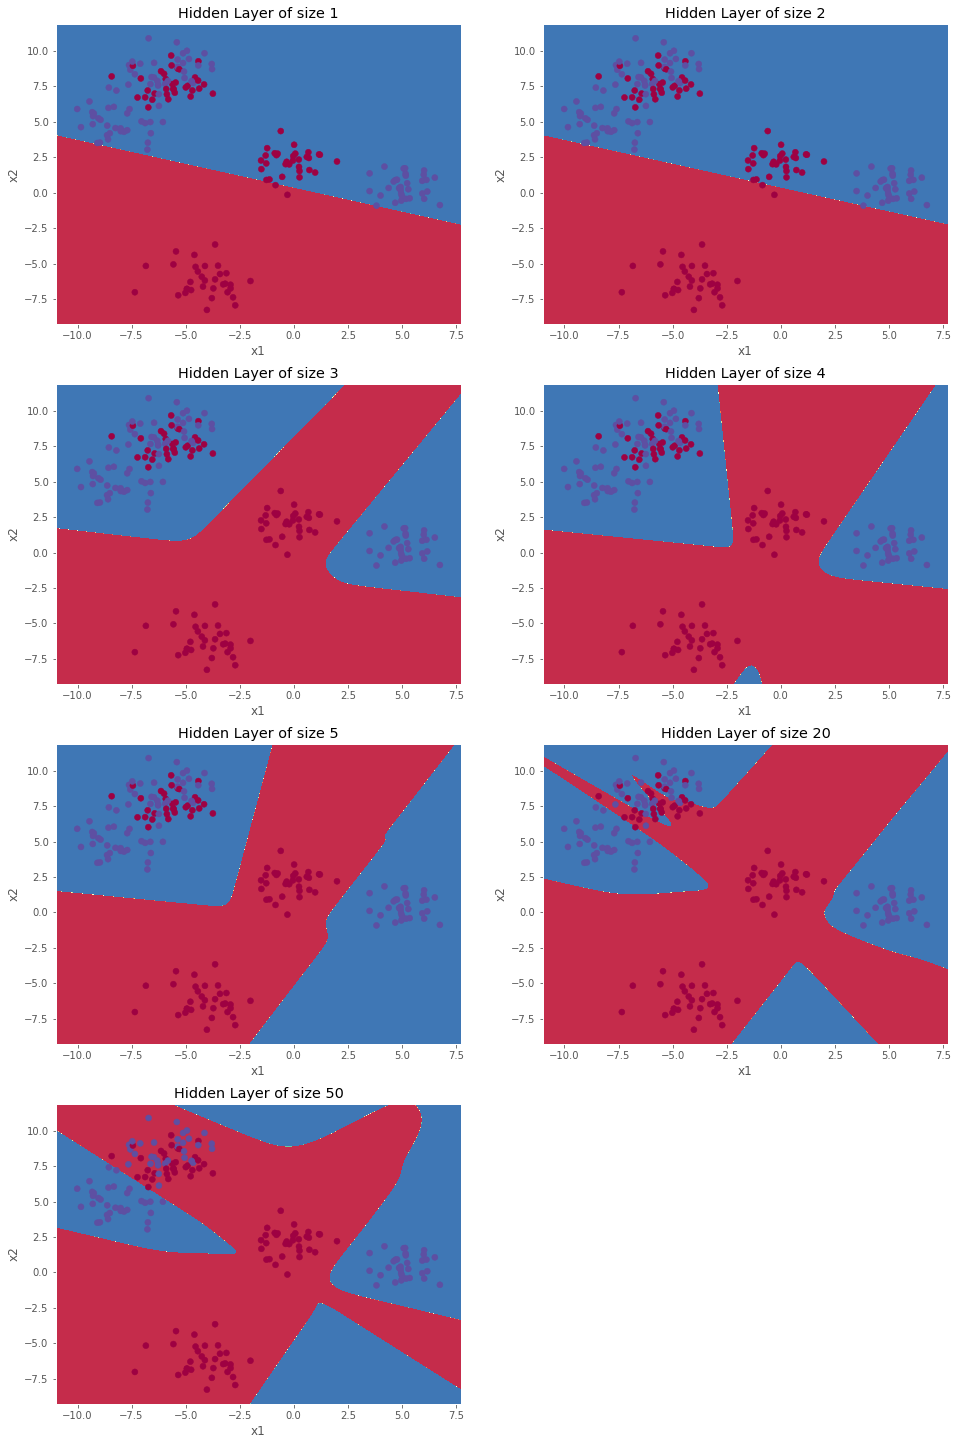

In [139]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size {}'.format(n_h))
    parameters = nn_model(X, Y, n_h, num_iterations=10000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y.flatten())
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T)) / float(Y.size) * 100)
    print ('Accuracy for {} hidden units : {} %'.format(n_h, accuracy))